# Consumer Complaints Analysis

  Customer service is an essential part of any organization since it help develop a customer base.Our main aim is to implement a sentiment analysis with the main customer service issues with some of the organizations and classify the Product depend upon customer reviews. 


Main goals:

1.Determine the top companies that received more disputes.

2.Is the trend of disputes increasing or decreasing? 

3.What is the overall sentiment of the issues? 

4.What is the sentiment for the top organizations that have disputes with regards to the issues declared by the customer

5.Classification of Product depend upon customer reviews.

# 1.Determine the top companies that received more disputes.

In [1]:
# Importing Necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
raw_data=pd.read_csv(r"/content/drive/MyDrive/consumer_complaints.csv")


<ipython-input-34-3056d4534d3d>:1: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data=pd.read_csv(r"/content/drive/MyDrive/consumer_complaints.csv")


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
raw_data.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067


In [ ]:
raw_data.shape

(555957, 18)

In [ ]:
raw_data.isnull().sum()  # Checking for NUll values

date_received                        0
product                              0
sub_product                     158322
issue                                0
sub_issue                       343335
consumer_complaint_narrative    489151
company_public_response         470833
company                              0
state                             4887
zipcode                           4505
tags                            477998
consumer_consent_provided       432499
submitted_via                        0
date_sent_to_company                 0
company_response_to_consumer         0
timely_response                      0
consumer_disputed?                   0
complaint_id                         0
dtype: int64

<Axes: >

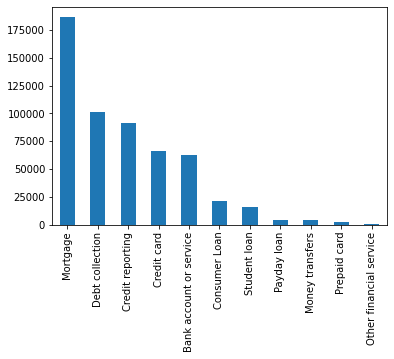

In [ ]:
# Number of Unique Products or number of classes.
raw_data['product'].value_counts().plot(kind='bar')

In [ ]:
raw_data["issue"].value_counts().head(10)  # Count of issues by product

Loan modification,collection,foreclosure    97191
Incorrect information on credit report      66718
Loan servicing, payments, escrow account    60375
Cont'd attempts collect debt not owed       42285
Account opening, closing, or management     26661
Communication tactics                       18293
Disclosure verification of debt             18292
Deposits and withdrawals                    17195
Application, originator, mortgage broker    13306
Billing disputes                            11042
Name: issue, dtype: int64

In [ ]:
max_disputes =raw_data.company.value_counts()
max_disputes

Bank of America                          55998
Wells Fargo & Company                    42024
JPMorgan Chase & Co.                     33881
Equifax                                  31828
Experian                                 30905
                                         ...  
Capital Recovery Corporation                 1
Brian A. Blitz, P.A.                         1
Account Information Management, Corp.        1
Bristlecone, Inc.                            1
ICUL Service Corporation                     1
Name: company, Length: 3605, dtype: int64

In [ ]:
print(f"Top 5 companies with Max disputes are = \n{max_disputes.head() }" )

Top 5 companies with Max disputes are = 
Bank of America          55998
Wells Fargo & Company    42024
JPMorgan Chase & Co.     33881
Equifax                  31828
Experian                 30905
Name: company, dtype: int64



# 2.Is the trend of disputes increasing or decreasing? 


In [35]:
raw_data["Date_month_year"]=raw_data["date_received"].apply(pd.to_datetime)


In [38]:
raw_data.date_received.sort_index(inplace=True)


,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id,Date_month_year
555952,07/01/2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,Bank of America,NaN,NaN,NaN,NaN,Referral,07/07/2014,Closed with explanation,Yes,No,919529,2014-07-01
555953,07/01/2014,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Residential Credit Solutions,NaN,NaN,"Older American, Servicemember",NaN,Referral,07/23/2014,Closed with explanation,No,No,918447,2014-07-01
555954,07/10/2012,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,BB&T Financial,NaN,NaN,NaN,NaN,Phone,11/18/2013,Closed with explanation,Yes,No,114550,2012-07-10
555955,04/14/2015,Debt collection,I do not know,Communication tactics,Frequent or repeated calls,NaN,NaN,Global Recovery Group,NaN,NaN,NaN,NaN,Phone,04/14/2015,Untimely response,No,No,1329963,2015-04-14
555956,08/14/2014,Debt collection,I do not know,Cont'd attempts collect debt not owed,Debt is not mine,NaN,NaN,"CCS Financial Services, Inc.",NaN,NaN,NaN,NaN,Phone,08/18/2014,Closed with explanation,Yes,No,984116,2014-08-14


In [39]:
x=raw_data.date_received
y=raw_data.issue

plo

NameError: ignored

SyntaxError: ignored

Obsevation : Trend of disputes increasing upto 2016 and then decreases for some months

# 3.What is the overall sentiment of the issues?

In [ ]:
df=raw_data[["company","issue","consumer_disputed?"]]

In [ ]:
df.isnull().sum()

company               0
issue                 0
consumer_disputed?    0
dtype: int64

In [ ]:
df["consumer_disputed?"].value_counts()

No     443823
Yes    112134
Name: consumer_disputed?, dtype: int64

In [ ]:
df[df["consumer_disputed?"] =="Yes"].value_counts()  # Top companies Issues on which consumer disputed


company                                   issue                                     consumer_disputed?
Bank of America                           Loan modification,collection,foreclosure  Yes                   5432
Equifax                                   Incorrect information on credit report    Yes                   4257
Wells Fargo & Company                     Loan modification,collection,foreclosure  Yes                   3437
TransUnion Intermediate Holdings, Inc.    Incorrect information on credit report    Yes                   2536
Experian                                  Incorrect information on credit report    Yes                   2472
                                                                                                          ... 
Orions Management Group, LLC              Improper contact or sharing of info       Yes                      1
Out Tech, Inc.                            Cont'd attempts collect debt not owed     Yes                      1
Overton, 

# 4.What is the sentiment for the top organizations that have disputes with regards to the issues declared by the customer 

In [ ]:
df[df["consumer_disputed?"] =="Yes"].value_counts()  # Issues on which consumer disputed


company                                   issue                                     consumer_disputed?
Bank of America                           Loan modification,collection,foreclosure  Yes                   5432
Equifax                                   Incorrect information on credit report    Yes                   4257
Wells Fargo & Company                     Loan modification,collection,foreclosure  Yes                   3437
TransUnion Intermediate Holdings, Inc.    Incorrect information on credit report    Yes                   2536
Experian                                  Incorrect information on credit report    Yes                   2472
                                                                                                          ... 
Orions Management Group, LLC              Improper contact or sharing of info       Yes                      1
Out Tech, Inc.                            Cont'd attempts collect debt not owed     Yes                      1
Overton, 

In [ ]:
df.sort_values(["issue"]).value_counts()

company                                 issue                                     consumer_disputed?
Experian                                Incorrect information on credit report    No                    19461
Equifax                                 Incorrect information on credit report    No                    18281
Bank of America                         Loan modification,collection,foreclosure  No                    17989
TransUnion Intermediate Holdings, Inc.  Incorrect information on credit report    No                    16760
Wells Fargo & Company                   Loan modification,collection,foreclosure  No                    11392
                                                                                                        ...  
PNC Bank N.A.                           Privacy                                   No                        1
Eisenburg,Whitman and Associates        Charged bank acct wrong day or amt        No                        1
Edward F Bukaty III

# Insights:

## Top issues frequently complained between top 10 companies:

###    1.Loan modification, collection, closure

###    2.Loan servicing, payments, escrow account

###    3.Inability to obtain credit report/score

###    4.Account opening, closing, or management


# Top 3 frequent issues:

   1.Loan modification, collection, closure

###    2.Incorrect information on credit report

###    3.Loan servicing, payments, escrow account

**GENERAL APPROACH**

1. Merge and Convert the Issue and sub issue into one columns and then into its numerical representation using TF-IDF scores.
2. Convert the product classes into numbers using label encoding.
3. Create a conventional machine learning model to complete the task. Since this is an introduction to NLP and we have chosen to work with truncated data, deep learning methods are not discussed.

This includes below Steps :

Step 1: Descriptive analysis
Step 2: Exploratory Data Analysis & Data preprocessing
Step 3: Data Modelling
Step 4: Model Evaluation
Step 5: Hyperparameter tuning

# Step 1: Descriptive analysis

Import libraries and dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Observation :

Our main goal to classify product on basis of customer reviews OR issues,
So we will merge issue and sub issue class to predict product at least with sub issues.

So for creating model we are considering 3 columns issue , sub issues and Product

In [ ]:
df1=raw_data[["product","issue","sub_issue"]]

MERGING ISSUE AND SUBISSUE


In [ ]:
df1["Detail_issues"]=df1["issue"].str.cat(df1["sub_issue"], sep=' ', na_rep='')

<ipython-input-7-a2ec157271de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Detail_issues"]=df1["issue"].str.cat(df1["sub_issue"], sep=' ', na_rep='')


DROP OLD COLUMN OF SUB ISSUE

In [ ]:
df1.drop(["issue","sub_issue"],inplace=True,axis=1)

<ipython-input-8-07ea321549a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(["issue","sub_issue"],inplace=True,axis=1)


In [ ]:
df1.isnull().sum()

product          0
Detail_issues    0
dtype: int64

# Step 2. Exploratory Data Analysis & Data Preprocessing

REMOVING STOP WORDS,SPECIAL CHARACTERS,DUPLICATE WORDS, STEMMING, CONVERTING TO LOWER , etc

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))

stemmer = SnowballStemmer('english')
# lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stop_words])
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    return text

df1['processed_text'] = df1['Detail_issues'].apply(preprocess_text)

print(df1.processed_text)

0                   loan modification,collection,foreclosur
1                  loan servicing, payments, escrow account
2             incorrect inform credit report account status
3                                     repay loan repay loan
4         fals statement represent attempt collect wrong...
                                ...                        
555952              loan modification,collection,foreclosur
555953             loan servicing, payments, escrow account
555954              loan modification,collection,foreclosur
555955                 communic tactic frequent repeat call
555956            cont'd attempt collect debt owe debt mine
Name: processed_text, Length: 555957, dtype: object


<ipython-input-11-e31db8b4d578>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['processed_text'] = df1['Detail_issues'].apply(preprocess_text)


In [ ]:
 # Removing special characters 
df1['processed_text'] = df1['processed_text'].replace('[^a-zA-Z]', ' ', regex=True) 


<ipython-input-12-f2f0b4e421d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['processed_text'] = df1['processed_text'].replace('[^a-zA-Z]', ' ', regex=True)


In [ ]:
def remove_duplicates(text):
    words = text.split()  # split the text into words
    unique_words = set(words)  # convert the list to a set to remove duplicates
    return ' '.join(unique_words)  # join the unique words back into a string

# apply the function to the column of text data
df1['processed_text'] = df1['processed_text'].apply(remove_duplicates)


<ipython-input-13-808f91b8bf6d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['processed_text'] = df1['processed_text'].apply(remove_duplicates)


In [ ]:
df1['processed_text']

0                   loan collection foreclosur modification
1                    loan payments escrow servicing account
2             inform incorrect account report credit status
3                                                loan repay
4         amount attempt collect statement fals wrong re...
                                ...                        
555952              loan collection foreclosur modification
555953               loan payments escrow servicing account
555954              loan collection foreclosur modification
555955                 communic frequent tactic repeat call
555956                 attempt collect debt mine cont owe d
Name: processed_text, Length: 555957, dtype: object

WORD EMBEDING USING TFIDF VECTOR AND LABEL ENCODING 

In [ ]:
# WORD EMBEDDING 
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()


In [ ]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')
features = tfidf.fit_transform(df1.processed_text).toarray()

print(features.shape)


(555957, 578)


In [ ]:
from sklearn.preprocessing import LabelEncoder

le =LabelEncoder()
labels = le.fit_transform(df1['product'])
print(labels.shape)

(555957,)


**TRAIN TEST SPLIT**

30 % of the total data is used as validation data while the remaining as training.

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, 
                                                    test_size=0.3,
                                                    random_state = 0)

# Step 3: Data Modelling

**TASK:** 
We will create a multi-class classification model and try to predict which product a given complaint refers to.


**1.LOGISTIC REGRESSION MODEL**

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
model = LogisticRegression(max_iter = 100)


In [ ]:
model.fit(X_train, y_train)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
print("Train Accuracy Regression:",model.score(X_train, y_train))
Logistic_Regression = print("Test Accuracy Regression:",model.score(X_test, y_test))


Train Accuracy Regression: 0.9852994457420812
Test Accuracy Regression: 0.9855445235868288


**2. RANDOM FOREST**


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [ ]:
model1 = RandomForestClassifier(max_depth=10)


In [ ]:
model1.fit(X_train, y_train)


RandomForestClassifier(max_depth=10)

In [ ]:
print("Train Accuracy RF:",model1.score(X_train, y_train))
Random_Forest =print("Test Accuracy RF:",model1.score(X_test, y_test))

Train Accuracy RF: 0.9118429268518304
Test Accuracy RF: 0.9128414514233638


**3.SVM MODEL**

In [ ]:
# Train an SVM model on the training data
from sklearn import svm
from sklearn import metrics


In [ ]:
model2=svm.SVC(kernel='rbf', C=1, gamma='scale')

In [ ]:
model2.fit(X_train, y_train)


SVC(C=1)

In [ ]:
print("Train Accuracy SVC:",model2.score(X_train, y_train))


Train Accuracy SVC: 0.9853045848975638


In [ ]:
SVM = print("Test Accuracy SVC:",model2.score(X_test, y_test))

Test Accuracy SVC: 0.9855685061275391


**4. NAIVE BAYES MODEL**

In [ ]:
# Import necessary libraries
from sklearn.naive_bayes import MultinomialNB


In [ ]:
model3 = MultinomialNB()

# Train the classifier on the training data
model3.fit(X_train, y_train)

# Predict the labels for the testing data
y_pred =model3.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = (y_pred == y_test).sum() / len(y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 97.96%


In [ ]:
print("Train Accuracy Regression:",model3.score(X_train, y_train))
Multinomial_Naive_Bayes = print("Test Accuracy Regression:",model3.score(X_test, y_test))


Train Accuracy Regression: 0.9792892034052044
Test Accuracy Regression: 0.979638822936902


**OBSERVATION AND BEST MODEL SELECTION**

<BarContainer object of 4 artists>

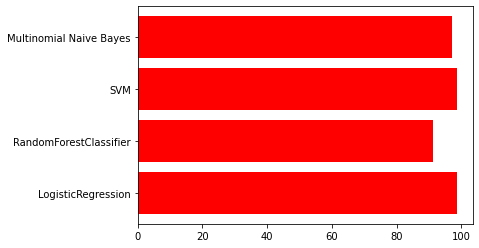

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Model=["LogisticRegression","RandomForestClassifier","SVM","Multinomial Naive Bayes"]
Accuracy=[98.5,91.2,98.5,97.2 ]
plt.barh(Model,Accuracy,color="r")


As per accuracy score, we can observe that accuracy score of Random forest is less than other models. All other models are approximately equal.


TF-IDF did better work in converting the complaint narratives to numerical vectors. Other word embedding methods like word2vec, doc2vec can be explored.

But observing time required for execution , Multinomial Naive Bayes Model is faster than all other models.

We can select **Multinomial Naive Bayes MODEL**

# Step 4: Hyper parameter Tuning & Model Evaluation

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score

In [ ]:
nb = MultinomialNB()

# Set up the hyperparameter tuning grid
param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0]}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(nb, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

# Train the Multinomial Naive Bayes classifier with the best hyperparameters
best_nb = MultinomialNB(alpha=grid_search.best_params_['alpha'])
best_nb.fit(X_train, y_train)

# Predict the labels for the testing data
y_pred = best_nb.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = (y_pred == y_test).sum() / len(y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Best hyperparameters:  {'alpha': 10.0}
Accuracy: 98.07%


In [ ]:
# Test the best model found by GridSearchCV on the testing set
y_pred = grid_search.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)


In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, 
                                    target_names= df1["product"].unique()))

                         precision    recall  f1-score   support

               Mortgage       1.00      1.00      1.00     18550
       Credit reporting       0.92      0.98      0.95      6113
           Student loan       0.98      0.90      0.94     19884
        Debt collection       1.00      1.00      1.00     27483
            Credit card       1.00      1.00      1.00     30406
Bank account or service       0.79      0.78      0.78      1176
          Consumer Loan       0.97      1.00      0.98     56338
        Money transfers       1.00      0.21      0.34       169
            Payday loan       0.92      1.00      0.96      1152
           Prepaid card       1.00      0.74      0.85       703
Other financial service       1.00      0.88      0.93      4814

               accuracy                           0.98    166788
              macro avg       0.96      0.86      0.89    166788
           weighted avg       0.98      0.98      0.98    166788



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[18550     0     0     0     0     0     0     0     0     0     0]
 [    0  6010     0     0     0     0     0     0   103     0     0]
 [    0     0 17986     0     0     0  1898     0     0     0     0]
 [    0     0     0 27435     0    48     0     0     0     0     0]
 [    0     0     0     0 30406     0     0     0     0     0     0]
 [    0     0   260     0     0   916     0     0     0     0     0]
 [    0     0     0     0     0     0 56338     0     0     0     0]
 [    0     0    68     0     8    58     0    35     0     0     0]
 [    0     0     0     0     0     0     0     0  1152     0     0]
 [    0     0    44     0     0   136     1     0     0   522     0]
 [    0   529     0     0     0     0    63     0     0     0  4222]]


**LETS PREDICT NEW INPUT ISSUE TO GET PRODUCTC DETAILS**

In [ ]:
new_input = "Incorrect on credit report account status"

# Convert the new input into a vector
new_input_vector = tfidf.transform([new_input])

# Predict the category of the new input
predicted_category = model3.predict(new_input_vector)

# input_prediction = le.inverse_transform(predicted_category)
# print(input_prediction)

In [ ]:
predicted_category

array([3])

In [ ]:
df1[["product","labels"]].value_counts().sort_index(ascending=True)

product                  labels
Bank account or service  0          62563
Consumer Loan            1          20990
Credit card              2          66468
Credit reporting         3          91854
Debt collection          4         101052
Money transfers          5           3812
Mortgage                 6         186475
Other financial service  7            557
Payday loan              8           3877
Prepaid card             9           2470
Student loan             10         15839
dtype: int64

### PICKLING A MODEL

In [ ]:
import joblib

In [ ]:
joblib.dump(model,r"/content/drive/MyDrive/'Capstone_Model_Deepak.pkl")

["/content/drive/MyDrive/'Capstone_Model_Deepak.pkl"]

In [ ]:
joblib.dump(grid_search,'Capstone_Model1.pkl')

['Capstone_Model1.pkl']

In [ ]:
df1.to_csv('df.csv', index=False)